In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

df = pd.read_csv("train.csv")

Dataset Shape: (891, 12)

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Target Distribution:
Survived
0    549
1    342
Name: count, dtype: int64


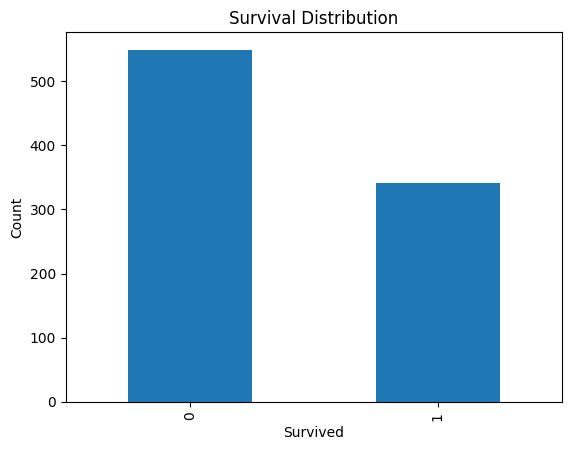

<Figure size 640x480 with 0 Axes>

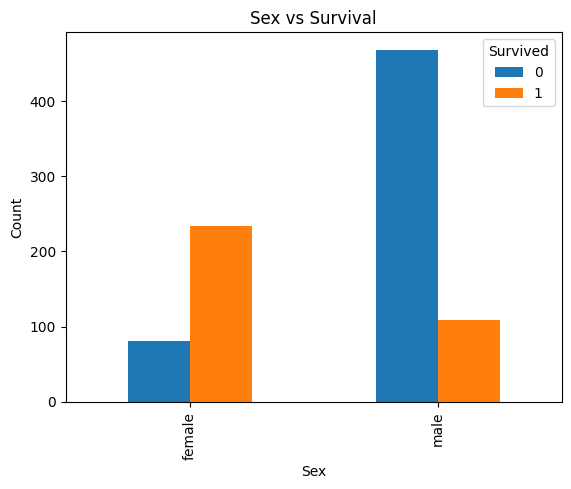


F1 Score (Basic Features): 0.7552447552447552


In [10]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Target distribution
print("\nTarget Distribution:")
print(df["Survived"].value_counts())

# Plot 1: Target distribution
plt.figure()
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

# Plot 2: Sex vs Survival
plt.figure()
pd.crosstab(df["Sex"], df["Survived"]).plot(kind="bar")
plt.title("Sex vs Survival")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# 4. BASIC FEATURES MODEL
y = df["Survived"]

X_basic = df[["Pclass", "Sex", "Age", "Fare"]].copy()
X_basic["Age"] = X_basic["Age"].fillna(X_basic["Age"].median())

pre_basic = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", sparse_output=False), ["Sex"]),
    ("num", "passthrough", ["Pclass", "Age", "Fare"])
])

model_basic = Pipeline([
    ("prep", pre_basic),
    ("clf", LogisticRegression(max_iter=1000))
])

Xtr, Xte, ytr, yte = train_test_split(
    X_basic, y, test_size=0.2, random_state=42
)

model_basic.fit(Xtr, ytr)
f1_basic = f1_score(yte, model_basic.predict(Xte))

print("\nF1 Score (Basic Features):", f1_basic)



In [11]:
# Feature Extraction: Title
df["Title"] = df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

df["Title"] = df["Title"].replace(
    ["Lady", "Countess", "Capt", "Col", "Don", "Dr",
     "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare"
).replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})

X_eng = df[["Pclass", "Sex", "Age", "Fare", "Title"]].copy()
X_eng["Age"] = X_eng["Age"].fillna(X_eng["Age"].median())

pre_eng = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", sparse_output=False), ["Sex", "Title"]),
    ("num", "passthrough", ["Pclass", "Age", "Fare"])
])

model_eng = Pipeline([
    ("prep", pre_eng),
    ("clf", LogisticRegression(max_iter=1000))
])

Xtr, Xte, ytr, yte = train_test_split(
    X_eng, y, test_size=0.2, random_state=42
)

model_eng.fit(Xtr, ytr)
f1_eng = f1_score(yte, model_eng.predict(Xte))

print("F1 Score (Basic + Title):", f1_eng)


F1 Score (Basic + Title): 0.7552447552447552
